In [6]:
from pandas_datareader import data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [7]:
base_compra = pd.read_csv(r'C:\Users\natha\Documents\01-Projetos\carteira_ações\base_compras_acoes.csv')
base_compra

,Codigo,data_compra,Valor Compra,Quantidade
0,ITSA4,25/02/2022,"9,93",25
1,ITSA4,02/03/2022,"9,16",51
2,ITSA4,19/03/2022,"9,42",5
3,BBSE3,06/07/2022,"25,07",30
4,SAPR4,06/07/2022,"3,64",100
5,ENBR3,01/04/2022,"23,81",20
6,ENBR3,01/05/2022,"20,89",50
7,ENBR3,30/05/2022,"21,66",50
8,ENBR3,04/07/2022,"20,55",50
9,MGLU3,20/04/2022,"5,95",20


In [8]:
base_compra.to_csv(r'C:\Users\natha\Documents\01-Projetos\carteira_ações\base_compras_acoes.csv', index=False)

In [9]:
acoes = base_compra['Codigo'].unique()
acoes

array(['ITSA4', 'BBSE3', 'SAPR4', 'ENBR3', 'MGLU3', 'AESB3', 'BBAS3'],
      dtype=object)

In [10]:
base_sumarizada = base_compra.groupby(['Codigo']).sum(['Valor Compra','Quantidade'])
base_sumarizada

,Quantidade
Codigo,
AESB3,30
BBAS3,100
BBSE3,30
ENBR3,170
ITSA4,81
MGLU3,267
SAPR4,100


In [11]:
import datetime as dt

# Busca as datas a serem usadas na consulta
hoje = dt.date.today().strftime('%m/%d/%Y')

if dt.date.today().weekday() == 6:
    n = 2
else:
    n = 1

ontem = dt.date.today() - dt.timedelta(n)
ontem = ontem.strftime('%m/%d/%Y')

ontem

'09/16/2022'

In [12]:
cotacao = pd.DataFrame()
# dividendos = pd.DataFrame()

for acao in acoes:
    temp = web.DataReader(
                    acao + '.SA',
                    data_source='yahoo',
                    start=ontem,
                    end=hoje)
    temp['acao'] = acao
    cotacao = cotacao.append(temp)

    # Busca os casos de dividendos 
    # temp = web.DataReader(
    #                 acao + '.SA',
    #                 data_source='yahoo-dividends',
    #                 start=hoje,
    #                 end=hoje)
    # temp['acao'] = acao
    # dividendos = dividendos.append(temp)
    
cotacao.reset_index()

C:\Users\natha\AppData\Local\Temp\ipykernel_7068\4057988154.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cotacao = cotacao.append(temp)
C:\Users\natha\AppData\Local\Temp\ipykernel_7068\4057988154.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cotacao = cotacao.append(temp)
C:\Users\natha\AppData\Local\Temp\ipykernel_7068\4057988154.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cotacao = cotacao.append(temp)
C:\Users\natha\AppData\Local\Temp\ipykernel_7068\4057988154.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cotacao = cotacao.append(temp)
C:\Users\natha\AppData\Local\Temp\ipykernel_7068\4057988154.py:11: F

,Date,High,Low,Open,Close,Volume,Adj Close,acao
0,2022-09-16,9.380000,9.230000,9.340000,9.280000,30174600,9.280000,ITSA4
1,2022-09-16,29.469999,28.209999,28.330000,29.469999,12579500,29.469999,BBSE3
2,2022-09-16,3.550000,3.500000,3.520000,3.550000,3590900,3.550000,SAPR4
3,2022-09-16,22.410000,21.850000,21.910000,22.340000,5406600,22.340000,ENBR3
4,2022-09-16,4.540000,4.150000,4.250000,4.460000,178337000,4.460000,MGLU3
5,2022-09-16,9.760000,9.560000,9.660000,9.760000,9768400,9.760000,AESB3
6,2022-09-16,39.639999,38.919998,39.639999,39.400002,36158700,39.400002,BBAS3


In [13]:
cotacao = cotacao.drop(columns=['High','Low','Open','Volume'])

In [14]:
base_completa = base_compra.merge(cotacao, how='left', left_on=['Codigo'], right_on=['acao'])
base_completa

,Codigo,data_compra,Valor Compra,Quantidade,Close,Adj Close,acao
0,ITSA4,25/02/2022,"9,93",25,9.280000,9.280000,ITSA4
1,ITSA4,02/03/2022,"9,16",51,9.280000,9.280000,ITSA4
2,ITSA4,19/03/2022,"9,42",5,9.280000,9.280000,ITSA4
3,BBSE3,06/07/2022,"25,07",30,29.469999,29.469999,BBSE3
4,SAPR4,06/07/2022,"3,64",100,3.550000,3.550000,SAPR4
5,ENBR3,01/04/2022,"23,81",20,22.340000,22.340000,ENBR3
6,ENBR3,01/05/2022,"20,89",50,22.340000,22.340000,ENBR3
7,ENBR3,30/05/2022,"21,66",50,22.340000,22.340000,ENBR3
8,ENBR3,04/07/2022,"20,55",50,22.340000,22.340000,ENBR3
9,MGLU3,20/04/2022,"5,95",20,4.460000,4.460000,MGLU3


In [15]:
base_completa.columns

Index(['Codigo', 'data_compra', 'Valor Compra', 'Quantidade', 'Close',
       'Adj Close', 'acao'],
      dtype='object')

In [16]:
base_completa['fechamento']= base_completa['Close'].round(2)
base_completa['preco_ajustado']= base_completa['Adj Close'].round(2)

base_completa['Valor Compra'] = base_completa['Valor Compra'].str.replace(',','.')
base_completa['Valor Compra'] = pd.to_numeric(base_completa['Valor Compra'])


base_completa.drop(columns=['Close','Adj Close','acao'],inplace=True)
base_completa

,Codigo,data_compra,Valor Compra,Quantidade,fechamento,preco_ajustado
0,ITSA4,25/02/2022,9.93,25,9.28,9.28
1,ITSA4,02/03/2022,9.16,51,9.28,9.28
2,ITSA4,19/03/2022,9.42,5,9.28,9.28
3,BBSE3,06/07/2022,25.07,30,29.47,29.47
4,SAPR4,06/07/2022,3.64,100,3.55,3.55
5,ENBR3,01/04/2022,23.81,20,22.34,22.34
6,ENBR3,01/05/2022,20.89,50,22.34,22.34
7,ENBR3,30/05/2022,21.66,50,22.34,22.34
8,ENBR3,04/07/2022,20.55,50,22.34,22.34
9,MGLU3,20/04/2022,5.95,20,4.46,4.46


In [17]:
base_completa['total_investido_compra'] = base_completa['Valor Compra'] * base_completa['Quantidade']
base_completa['total_investido_hoje'] = base_completa['fechamento'] * base_completa['Quantidade']

base_completa['ganho_perda_hoje'] = base_completa['total_investido_hoje'] - base_completa['total_investido_compra'] 
base_completa['ganho_perda_hoje_percentual'] = round((base_completa['ganho_perda_hoje'] / base_completa['total_investido_compra']) *100, 2)

base_completa

,Codigo,data_compra,Valor Compra,Quantidade,fechamento,preco_ajustado,total_investido_compra,total_investido_hoje,ganho_perda_hoje,ganho_perda_hoje_percentual
0,ITSA4,25/02/2022,9.93,25,9.28,9.28,248.25,232.00,-16.25,-6.55
1,ITSA4,02/03/2022,9.16,51,9.28,9.28,467.16,473.28,6.12,1.31
2,ITSA4,19/03/2022,9.42,5,9.28,9.28,47.10,46.40,-0.70,-1.49
3,BBSE3,06/07/2022,25.07,30,29.47,29.47,752.10,884.10,132.00,17.55
4,SAPR4,06/07/2022,3.64,100,3.55,3.55,364.00,355.00,-9.00,-2.47
5,ENBR3,01/04/2022,23.81,20,22.34,22.34,476.20,446.80,-29.40,-6.17
6,ENBR3,01/05/2022,20.89,50,22.34,22.34,1044.50,1117.00,72.50,6.94
7,ENBR3,30/05/2022,21.66,50,22.34,22.34,1083.00,1117.00,34.00,3.14
8,ENBR3,04/07/2022,20.55,50,22.34,22.34,1027.50,1117.00,89.50,8.71
9,MGLU3,20/04/2022,5.95,20,4.46,4.46,119.00,89.20,-29.80,-25.04


In [18]:
base_completa.columns

Index(['Codigo', 'data_compra', 'Valor Compra', 'Quantidade', 'fechamento',
       'preco_ajustado', 'total_investido_compra', 'total_investido_hoje',
       'ganho_perda_hoje', 'ganho_perda_hoje_percentual'],
      dtype='object')

In [19]:
base_completa2 = base_completa.drop(columns=[ 'data_compra',
       'Valor Compra', 'Quantidade', 'fechamento', 'preco_ajustado','ganho_perda_hoje_percentual'])

In [20]:
base_sum = base_completa2.groupby(['Codigo']).sum().reset_index()
base_sum

,Codigo,total_investido_compra,total_investido_hoje,ganho_perda_hoje
0,AESB3,431.10,292.80,-138.30
1,BBAS3,3387.00,3940.00,553.00
2,BBSE3,752.10,884.10,132.00
3,ENBR3,3631.20,3797.80,166.60
4,ITSA4,762.51,751.68,-10.83
5,MGLU3,1112.05,1190.82,78.77
6,SAPR4,364.00,355.00,-9.00


In [21]:
acoes = list(base_sum['Codigo'])
total_investido = list(base_sum['total_investido_hoje'])


In [22]:
explode = ()

In [35]:
def gera_pizza(df):
    acoes = df['Codigo']
    total_investido = df['total_investido_hoje']
    
    plt.pie(total_investido,
    labels=acoes,
    autopct='%1.1f%%',
    pctdistance=0.85)
    plt.title('Divisão da Carteira')
    return plt.gcf()

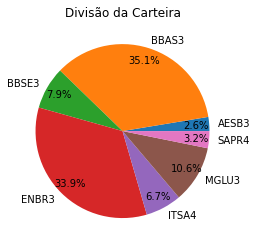

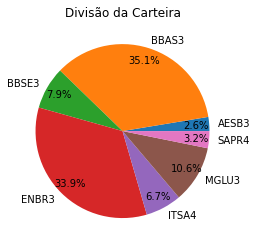

In [36]:
gera_pizza(base_sum)

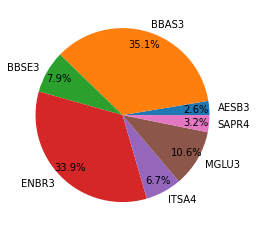

In [26]:
plt.pie(
    total_investido,
    labels=acoes,
    autopct='%1.1f%%',
    pctdistance=0.85,
    # explode=explode
);

In [27]:
ganho_perda_total = base_completa2['ganho_perda_hoje'].sum()
ganho_perda_total

772.2400000000004